In [1]:
# 1：ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import cluster, preprocessing #機械学習用のライブラリを利用
from sklearn import datasets #使用するデータ

In [2]:
# 2：moon型のデータを読み込む--------------------------------
X, z = datasets.make_moons(n_samples=200, noise=0.05, random_state=0)

In [8]:
# 3：データの整形-------------------------------------------------------
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)

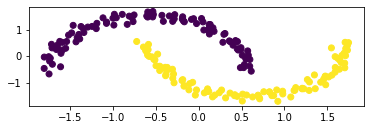

In [14]:
# 4：プロットしてみる------------------------------------------
%matplotlib inline

x=X_norm[:, 0]
y=X_norm[:, 1]
plt.subplot(3, 1, 1)
plt.scatter(x, y, c=z)
plt.show()

In [17]:
# 4：KMeansを実施---------------------------------
km=cluster.KMeans(n_clusters=2)
z_km=km.fit(X_norm)

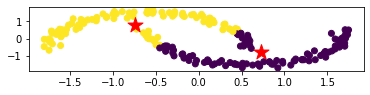

In [20]:
# 5: 結果をプロット-----------------------------------------------
plt.subplot(3, 1, 2)
plt.scatter(x, y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:, 0], z_km.cluster_centers_[:, 1], s=250, marker="*", c="red")
plt.show()

In [23]:
# 解説6：SpectralClusteringを実施---------------------------------
# これはクラスター数を2と設定し、affinity（親和性）をnearest_neighborsと設定しています。
# affinityとはSpectralClusteringを実施する途中で、サンプルデータをグラフ行列に書き換えるのですが、そのグラフの作り方を設定しています。
# ここでは、近いデータとつながるグラフを作成します。
km=cluster.SpectralClustering(n_clusters=2, affinity="nearest_neighbors")
z_km=km.fit(X_norm)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


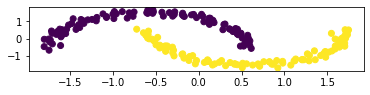

In [30]:
# 7: 結果をプロット-----------------------------------------------
plt.subplot(3,1,3)
plt.scatter(x, y, c=z_km.labels_)
plt.show()